## Import Required Packages

In [1]:
import tensorflow as tf

## Load the Dataset

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


In [3]:
y_train = y_train == 2
y_test = y_test == 2

In [4]:
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_train /= 255
x_test /= 255

## Model Building

In [5]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Conv2D(
            32, (3, 3), padding="same", input_shape=(32, 32, 3), activation="relu"
        ),
        tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Conv2D(64, (3, 3), padding="same", activation="relu"),
        tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation="relu"),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1, activation="sigmoid"),
    ]
)

In [6]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"],
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 15, 15, 32)        128       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        1

In [7]:
history = model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=20,
    validation_data=(x_test, y_test),
    shuffle=True,
)

Epoch 1/20
1563/1563 [==============================] - 21s 8ms/step - loss: 0.3264 - accuracy: 0.8921 - val_loss: 0.3274 - val_accuracy: 0.9003
Epoch 2/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.2533 - accuracy: 0.9058 - val_loss: 0.2513 - val_accuracy: 0.9088
Epoch 3/20
1563/1563 [==============================] - 12s 7ms/step - loss: 0.2338 - accuracy: 0.9123 - val_loss: 0.2654 - val_accuracy: 0.9046
Epoch 4/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.2170 - accuracy: 0.9182 - val_loss: 0.2076 - val_accuracy: 0.9213
Epoch 5/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.2046 - accuracy: 0.9242 - val_loss: 0.2530 - val_accuracy: 0.9121
Epoch 6/20
1563/1563 [==============================] - 10s 7ms/step - loss: 0.1922 - accuracy: 0.9282 - val_loss: 0.1919 - val_accuracy: 0.9284
Epoch 7/20
1563/1563 [==============================] - 12s 8ms/step - loss: 0.1779 - accuracy: 0.9332 - val_loss: 0.3346 - val_ac

## Model Evaluation

In [8]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

313/313 [==============================] - 1s 3ms/step - loss: 0.1839 - accuracy: 0.9412
Test Loss: 0.18387795984745026, Test Accuracy: 0.9412000179290771


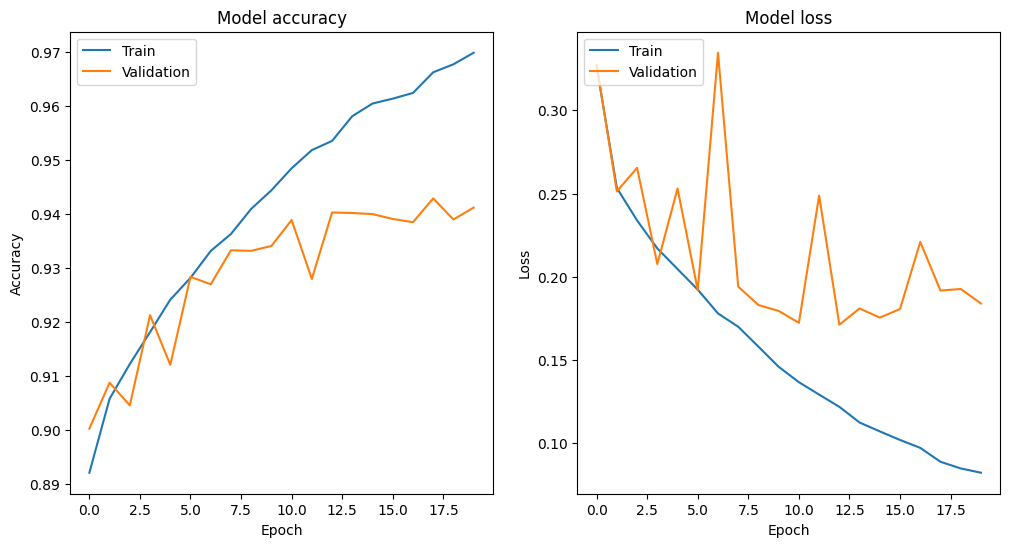

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()

## Model Saving

In [10]:
model.save("./model/bird_model.keras")